<a href="https://colab.research.google.com/github/m-ary-t/CA01-Exploratory-Data-Analysis---House-Price-Analysis/blob/main/CA01_EDA_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading & Importing

In [1]:
!pip install ydata-profiling -q

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns

In [3]:
housing_data = pd.read_csv('https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv')

# Data Understanding

### Correcting Variable Data Types

1. Creating Lists of Numeric vs. Catrgorical (Nominal & Ordinal) Variables in the housing_data

In [4]:
# === NUMERICAL (measurements, counts, years) ===
numerical_cols = [
    'LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea',
    'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
    '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
    'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
     'TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea',
    'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
    'PoolArea','MiscVal','MoSold','YrSold', 'BedroomAbvGr', 'KitchenAbvGr', 'SalePrice'
]

# === CATEGORICAL - NOMINAL (labels with no order; note MSSubClass is a code) ===
categorical_nominal_cols = [
    'MSSubClass','MSZoning','Street','Alley','LandContour','Utilities','LotConfig',
    'Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
    'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
    'Foundation','Heating','CentralAir','Electrical','GarageType',
    'MiscFeature','SaleType','SaleCondition'
]

# === CATEGORICAL - ORDINAL (ranked levels) ===
categorical_ordinal_cols = [
    'OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond', 'BsmtFinType1', 'BsmtFinType2',
    'HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC',
    'GarageFinish','Functional','BsmtExposure','LotShape','LandSlope','PavedDrive','Fence'
]

In [5]:
print(len(numerical_cols))
print(len(categorical_nominal_cols))
print(len(categorical_ordinal_cols))
print(len(categorical_ordinal_cols) + len(categorical_nominal_cols) + len(numerical_cols))

34
25
21
80


2. Some Categorical Variables use NA to represent that the house does not have that feature instead of saying "None", which can be misleading/confused for a missing value. So, all of these values will be replaced with "None"

In [6]:
none_as_category = [
    'Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
    'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
    'PoolQC','Fence','MiscFeature', 'MasVnrType']
for c in none_as_category:
    if c in housing_data.columns:
        housing_data[c] = housing_data[c].fillna('None')

3. Change the data types of the Nomical Categorical Variables to Category

In [7]:
for c in categorical_nominal_cols:
    if c in housing_data.columns:
        housing_data[c] = housing_data[c].astype('category')


4. Change the data types of the Ordinal Categorical Variables to Categorical by their Levels *(used Google Copilot to help me produce this code)*

In [8]:
ordered_maps = {
    # Quality / Condition (worst -> best)
    'ExterQual':   ['Po','Fa','TA','Gd','Ex'],
    'ExterCond':   ['Po','Fa','TA','Gd','Ex'],
    'BsmtQual':    ['None','Po','Fa','TA','Gd','Ex'],   # use 'None' if you filled NA above
    'BsmtCond':    ['None','Po','Fa','TA','Gd','Ex'],
    'BsmtFinType1': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'HeatingQC':   ['Po','Fa','TA','Gd','Ex'],
    'KitchenQual': ['Po','Fa','TA','Gd','Ex'],
    'FireplaceQu': ['None','Po','Fa','TA','Gd','Ex'],
    'GarageQual':  ['None','Po','Fa','TA','Gd','Ex'],
    'GarageCond':  ['None','Po','Fa','TA','Gd','Ex'],
    'PoolQC':      ['None','Fa','TA','Gd','Ex'],

    # Finish / exposure / functional etc.
    'GarageFinish':['None','Unf','RFn','Fin'],          # Unf < RFn < Fin
    'BsmtExposure':['None','No','Mn','Av','Gd'],        # No < Mn < Av < Gd
    'Functional':  ['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'], # worst -> best

    # Shape / slope / drive (least favorable -> most)
    'LotShape':    ['IR3','IR2','IR1','Reg'],           # more irregular -> regular
    'LandSlope':   ['Sev','Mod','Gtl'],                 # severe -> gentle
    'PavedDrive':  ['N','P','Y'],                       # no -> partial -> yes

    # Fence (lower privacy/quality -> higher)
    'Fence':       ['None','MnWw','GdWo','MnPrv','GdPrv']  # wire/wood -> privacy
    }

for c, order in ordered_maps.items():
    if c in housing_data.columns:
        housing_data[c] = pd.Categorical(housing_data[c], categories=order, ordered=True)

^ To go further, the Categorical Variables OverallQual' and 'OverallCond' are defined as 1=Very Poor … 10=Very Excellent. We can also make this an ordered categorical data type

In [9]:
for c in ['OverallQual','OverallCond']:
    if c in housing_data.columns:
        housing_data[c] = pd.Categorical(
            housing_data[c],
            categories=[1,2,3,4,5,6,7,8,9,10],
            ordered=True)


### Checking the Data Types were correctly changed

In [10]:
housing_data['MasVnrType'].unique()

['BrkFace', 'None', 'Stone', 'BrkCmn']
Categories (4, object): ['BrkCmn', 'BrkFace', 'None', 'Stone']

In [11]:
import numpy as np

cat_var  = housing_data.select_dtypes(include=['category']).columns.tolist()
cont_var = housing_data.select_dtypes(include=[np.number]).columns.tolist()

print(f"Categorical columns: {len(cat_var)}")
print(f"Numeric columns:     {len(cont_var)}")


Categorical columns: 46
Numeric columns:     35


In [12]:
# Spot-check ordering flags
check_ord = [c for c in categorical_ordinal_cols if c in housing_data.columns]
{c: getattr(housing_data[c], 'cat', None).ordered for c in check_ord}


{'OverallQual': True,
 'OverallCond': True,
 'ExterQual': True,
 'ExterCond': True,
 'BsmtQual': True,
 'BsmtCond': True,
 'BsmtFinType1': True,
 'BsmtFinType2': True,
 'HeatingQC': True,
 'KitchenQual': True,
 'FireplaceQu': True,
 'GarageQual': True,
 'GarageCond': True,
 'PoolQC': True,
 'GarageFinish': True,
 'Functional': True,
 'BsmtExposure': True,
 'LotShape': True,
 'LandSlope': True,
 'PavedDrive': True,
 'Fence': True}

In [13]:
# Peek at categories for a few key fields
for c in ['BsmtExposure','GarageFinish','Functional','LotShape','PavedDrive','Fence']:
    if c in housing_data.columns and hasattr(housing_data[c], 'cat'):
        print(c, '->', list(housing_data[c].cat.categories))

BsmtExposure -> ['None', 'No', 'Mn', 'Av', 'Gd']
GarageFinish -> ['None', 'Unf', 'RFn', 'Fin']
Functional -> ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
LotShape -> ['IR3', 'IR2', 'IR1', 'Reg']
PavedDrive -> ['N', 'P', 'Y']
Fence -> ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']


## YData Report

YData is an automated Exploratory Data Analysis (EDA) and Data Quality Report with a statistical overview of the dataset, including the number of observations and variables, variable data types, distributions, and summary statistics. It also identifies potential data quality issues such as missing values, highly skewed numerical features, zero-inflated variables, highly imbalanced categorical variables, duplicate records, strongly correlated features, and highlights relationships between variables through correlation and interaction analyses.

In [14]:
ProfileReport(housing_data).to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 81/81 [00:04<00:00, 19.54it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Findings:
- The data has 81 Variables and 1460 records.
- The target variable house price is labeled as 'SalePrice'.
- The original data types of these variables include objects, integers, and floats.
- After observing the data_decrpition text file, we find that there are 34 numerical variables, 25 nominal categorical variables, and 21 ordinal categorical variables.
- The YData Data Quality Report shows us that we have:
  - Missing Values for 'LotFrontage' and 'GarageYrBlt'
  - Several numerical variables exhibit strong right skewness and heavy-tailed distributions, in particular 'LotArea' and 'LotFrontage'
  - Several numerical variables are dominated by zero values, meaning a majority of the homes observed in the data do not have those specific features
  - Many categorical variables have severe class imbalances, where one category accounts for an overwhelming majority of the observations (often more than 90%).  
  - Multiple pairs of variables have strong correlations, mainly concerning  size and area related variables - like basement areas, garage size measures, and floor areas -   indicating potential multicollinearity


# Pre-Processing

## Handling Missing Values

The Data Quality Report shows that the following variables have missing values (*note, both are continuous variables)

- 'LotFrontage' with 17.7% missing values
- 'GarageYrBlt' with 5.5% missing values


---



Since the percentage of missing values are not that large, we will not remove them. The Data Quality Report states that 'LotFrontage' is highly correlated with 'LotArea' and 'Utilities', so we will impute the missing values with their central tendancy. Since 'LotFrontage' is a continuous variable, we can use the mean or median. For 'LotFrontage', Mean = 70.05 and Median = 69, so we will use the mean.



---



Observing the Data Quality Report, we see that 'GarageYrBlt', which represents the year the garage was built, has 81 NA values and the variable 'GarageType' has 81 houses in the data that have "None" as their value, indiciating the home does not have a garage. We will use the indicator 0 for the missing values of this variable.



In [15]:
#Imputing the Missing Values in 'LotFrontage' with the mean
housing_data['LotFrontage'] = housing_data['LotFrontage'].fillna(housing_data['LotFrontage'].mean())


In [16]:
#Checking that all NA's for 'LotFrontage' were filled
housing_data[housing_data['LotFrontage'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [17]:
#Checking that the 81 missing values in 'GarageYrBlt' is the same as the 81 "None" values in 'GarageType
housing_data[(housing_data['GarageYrBlt'].isna()) & (housing_data['GarageType'] == 'None')]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.000000,6040,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.000000,4456,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,6,2009,New,Partial,113000
78,79,90,RL,72.000000,10778,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.000000,8470,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,None,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.000000,8070,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1350,70,RM,50.000000,5250,Pave,Pave,Reg,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,122000
1407,1408,20,RL,70.049958,8780,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,None,0,3,2009,WD,Normal,112000
1449,1450,180,RM,21.000000,1533,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2006,WD,Abnorml,92000
1450,1451,90,RL,60.000000,9000,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,9,2009,WD,Normal,136000


In [18]:
#Filling the NA values of 'GarageYrBlt' with 0
housing_data['GarageYrBlt'] = housing_data['GarageYrBlt'].fillna(0)

In [19]:
#Checking that all NA's for 'GarageYrBlt' were filled
housing_data[housing_data['GarageYrBlt'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


## Handling Outliers

In [20]:
housing_data['LotArea'].sort_values(ascending = False)
#We see that the highest Lot Area's are not too drastically different from one another,
#indicating there's not an invalid outlier due to any input errors

,LotArea
313,215245
335,164660
249,159000
706,115149
451,70761
...,...
1449,1533
489,1526
614,1491
1039,1477


In [21]:
housing_data['LotFrontage'].sort_values(ascending = False)
#We see that the highest Lot Frontage's are not too drastically different from one another,
#indicating there's not an invalid outlier due to any input errors

,LotFrontage
1298,313.0
934,313.0
1127,182.0
231,174.0
197,174.0
...,...
434,21.0
1378,21.0
225,21.0
227,21.0


### Findings:

Even though there are variables with right skewed distributions, the variables relate to housing features, so the reason for these skews are likely a result of only a few records having higher values than others, not really indicating any invalid outliers. These larger values may help indicate features that impact our target variable, 'SalePrice', therefore we will keep them as is.

## Scaling

In [22]:
#Checking which variables are numerical
num_var = housing_data.select_dtypes(exclude ='category')
num_var.to_csv('num_var.csv')

In [23]:
#Choosing the numerical variables that are continuous and need scaling
scale_vars = [
    'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
    '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
    'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'MiscVal',
    'YearBuilt', 'YearRemodAdd', 'YrSold']

In [24]:
#scaling the continuous variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing_data[scale_vars] = scaler.fit_transform(housing_data[scale_vars])

### Findings:
Although many variables are stored as integers, only the variables that are continuous, such as area, year, or monetary values, were scaled. Count variables with small/bounded ranges and identifier variables were excluded from scaling.

## Encoding

### Ordinal Categorical Variables

Previously in the Data Understanding Section, under 'Correcting Variable Data Types' we created 'ordered_maps', which put the values of the ordinal variables in their correct order.

Now we will encode these variables using cat code so that instead of having text as their values, the texts will be represent by numerical values

In [25]:
for c, order in ordered_maps.items():
    if c in housing_data.columns:
        housing_data[c] = pd.Categorical(housing_data[c], categories=order, ordered=True)
        housing_data[c] = housing_data[c].cat.codes

In [26]:
#Checking that all the categorical ordinal variables are encoded
housing_data[categorical_ordinal_cols]

,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,...,GarageQual,GarageCond,PoolQC,GarageFinish,Functional,BsmtExposure,LotShape,LandSlope,PavedDrive,Fence
0,7,5,3,2,4,3,6,1,4,3,...,3,3,0,2,7,1,3,2,2,0
1,6,8,2,2,4,3,5,1,4,2,...,3,3,0,2,7,4,3,2,2,0
2,7,5,3,2,4,3,6,1,4,3,...,3,3,0,2,7,2,2,2,2,0
3,7,5,2,2,3,4,5,1,3,3,...,3,3,0,1,7,1,2,2,2,0
4,8,5,3,2,4,3,6,1,4,3,...,3,3,0,2,7,3,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,5,2,2,4,3,1,1,4,2,...,3,3,0,2,7,1,3,2,2,0
1456,6,6,2,2,4,3,5,3,2,2,...,3,3,0,1,6,1,3,2,2,3
1457,7,9,4,3,3,4,6,1,4,3,...,3,3,0,2,7,1,3,2,2,4
1458,5,6,2,2,3,3,6,3,3,3,...,3,3,0,1,7,2,3,2,2,0


### Nominal Categorical Variables

Previously in the Data Understanding Section, under 'Correcting Variable Data Types' we created 'categorical_nominal_cols' which is a list of all the nominal categorical variables.

Since these variables are nominal and have no distinct order, we will use One-Hot Encoding to turn their values that are text into numerical values.

In [27]:
#Nominal Categorical Variables before One-Hot Encoding
housing_data[categorical_nominal_cols]

,MSSubClass,MSZoning,Street,Alley,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,...,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,None,Lvl,AllPub,Inside,CollgCr,Norm,Norm,...,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,None,WD,Normal
1,20,RL,Pave,None,Lvl,AllPub,FR2,Veenker,Feedr,Norm,...,MetalSd,None,CBlock,GasA,Y,SBrkr,Attchd,None,WD,Normal
2,60,RL,Pave,None,Lvl,AllPub,Inside,CollgCr,Norm,Norm,...,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,None,WD,Normal
3,70,RL,Pave,None,Lvl,AllPub,Corner,Crawfor,Norm,Norm,...,Wd Shng,None,BrkTil,GasA,Y,SBrkr,Detchd,None,WD,Abnorml
4,60,RL,Pave,None,Lvl,AllPub,FR2,NoRidge,Norm,Norm,...,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,None,Lvl,AllPub,Inside,Gilbert,Norm,Norm,...,VinylSd,None,PConc,GasA,Y,SBrkr,Attchd,None,WD,Normal
1456,20,RL,Pave,None,Lvl,AllPub,Inside,NWAmes,Norm,Norm,...,Plywood,Stone,CBlock,GasA,Y,SBrkr,Attchd,None,WD,Normal
1457,70,RL,Pave,None,Lvl,AllPub,Inside,Crawfor,Norm,Norm,...,CmentBd,None,Stone,GasA,Y,SBrkr,Attchd,Shed,WD,Normal
1458,20,RL,Pave,None,Lvl,AllPub,Inside,NAmes,Norm,Norm,...,MetalSd,None,CBlock,GasA,Y,FuseA,Attchd,None,WD,Normal


In [28]:
#One-Hot Encoding with help from Google Copilot
from sklearn.preprocessing import OneHotEncoder

# 1) Select only the nominal categorical variables
X_cat = housing_data[categorical_nominal_cols]

# 2) Create and fit the encoder
ohe = OneHotEncoder(
    handle_unknown="ignore",   # safe if unseen categories appear later
    drop="first",
    sparse_output=False,       # return dense array
    dtype=int
)
X_cat_encoded = ohe.fit_transform(X_cat)

# 3) Convert encoded columns to a DataFrame (aligned by index)
encoded_feature_names = ohe.get_feature_names_out(categorical_nominal_cols)
X_cat_encoded_df = pd.DataFrame(
    X_cat_encoded,
    columns=encoded_feature_names,
    index=housing_data.index
)

# 4) Replace the original categorical columns in housing_data with the encoded ones
#    (drop the original categorical columns, then join the encoded DataFrame)
housing_data = housing_data.drop(columns=categorical_nominal_cols).join(X_cat_encoded_df)


In [29]:
#housing_data after One-Hot Encoding
housing_data.head()

,Id,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,-0.207142,3,2,7,5,1.050994,0.878668,196.0,...,0,0,0,0,1,0,0,0,1,0
1,2,80.0,-0.091886,3,2,6,8,0.156734,-0.429577,0.0,...,0,0,0,0,1,0,0,0,1,0
2,3,68.0,0.073480,2,2,7,5,0.984752,0.830215,162.0,...,0,0,0,0,1,0,0,0,1,0
3,4,60.0,-0.096897,2,2,7,5,-1.863632,-0.720298,0.0,...,0,0,0,0,1,0,0,0,0,0
4,5,84.0,0.375148,2,2,8,5,0.951632,0.733308,350.0,...,0,0,0,0,1,0,0,0,1,0


# Post-Processing

We will now check the colinearity between the numerical columns

In [30]:
#Selecting the Numeric Columns from the data
numeric_cols = housing_data.select_dtypes(include=["int64", "float64"])

In [31]:
#Creating a correlation matrix of the numerical variables
corr_matrix = numeric_cols.corr()
corr_matrix

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,-0.009601,-0.033226,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,...,-0.058765,-0.020738,-0.018998,0.038920,0.026133,-0.034852,-0.009018,0.004865,0.015881,-0.020738
LotFrontage,-0.009601,1.000000,0.306795,0.117598,0.082746,0.179700,0.215828,0.043340,0.122156,0.363358,...,0.012674,-0.051787,0.126580,-0.023461,-0.089928,-0.037020,-0.018090,0.015818,-0.072074,0.124842
LotArea,-0.033226,0.306795,1.000000,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,...,0.001076,-0.015040,0.020039,-0.005722,-0.002292,-0.013208,0.008966,-0.010781,0.005711,0.022635
YearBuilt,-0.012713,0.117598,0.014228,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,...,0.002975,-0.023431,0.346954,0.012122,-0.238463,-0.045601,-0.010104,-0.035785,-0.158427,0.343895
YearRemodAdd,-0.021998,0.082746,0.013788,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,...,0.011175,-0.039952,0.325647,-0.011431,-0.182733,-0.040294,-0.020727,-0.048056,-0.120577,0.322837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.034852,-0.037020,-0.013208,-0.045601,-0.040294,-0.011959,-0.014874,-0.015130,-0.034618,-0.055895,...,-0.003073,-0.003073,-0.015827,-0.002378,0.020457,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,-0.009018,-0.018090,0.008966,-0.010104,-0.020727,-0.010116,0.021369,-0.026277,-0.059130,-0.047002,...,-0.005337,-0.005337,-0.027489,-0.004131,0.035530,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.004865,0.015818,-0.010781,-0.035785,-0.048056,-0.009915,0.000765,-0.007929,0.021534,0.019569,...,-0.006909,-0.006909,-0.035587,-0.005348,0.028599,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.015881,-0.072074,0.005711,-0.158427,-0.120577,-0.084801,-0.019560,0.041207,-0.153930,-0.160222,...,-0.003139,0.027414,-0.645698,-0.097031,0.634322,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


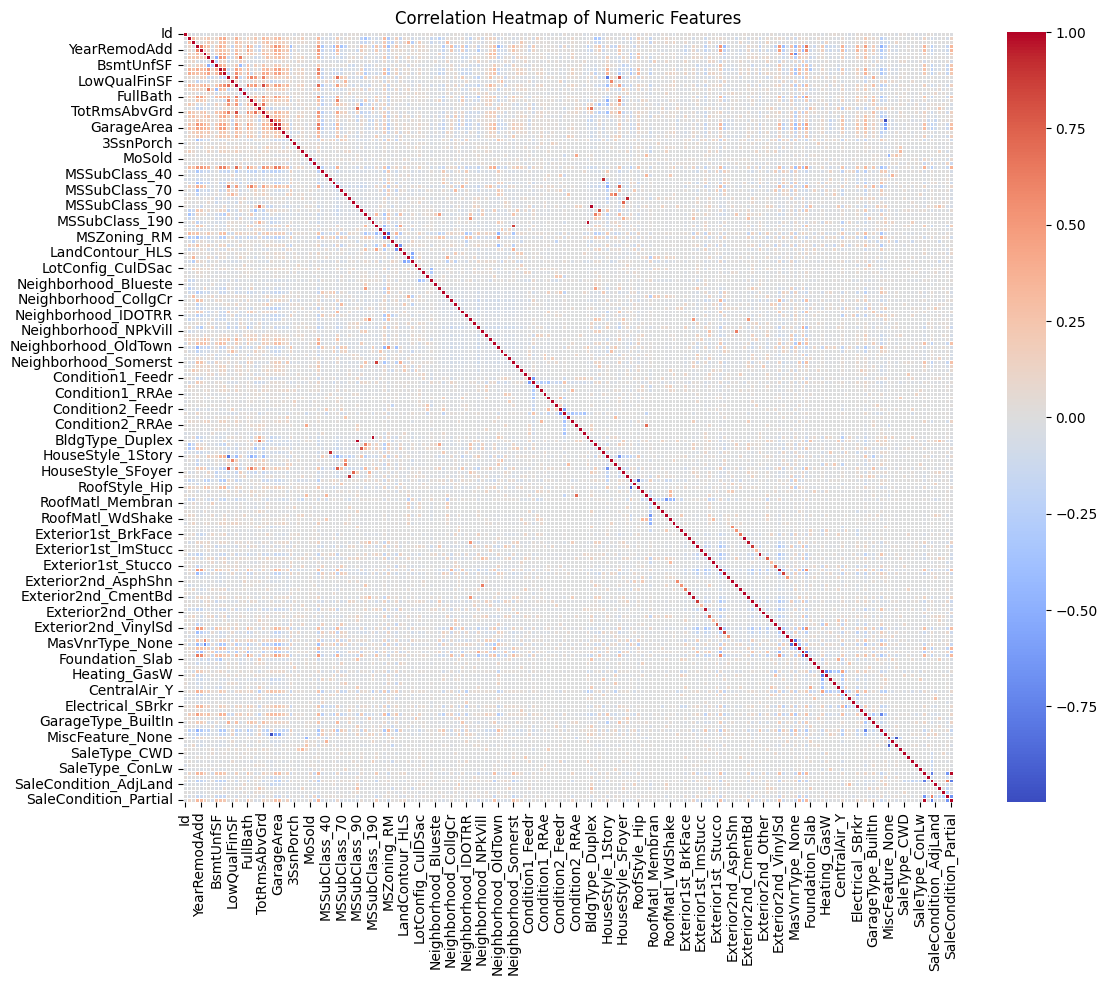

In [32]:
#HeatMap Visualization of the Correlation Matrix
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [35]:
# 1) Absolute correlations
abs_corr = corr_matrix.abs()

# 2) Upper triangle to avoid duplicates
upper_tri = abs_corr.where(np.triu(np.ones(abs_corr.shape), k=1).astype(bool))

# 3) Collect pairs above threshold
threshold = 0.80
high_corr_pairs = [
    (row, col, upper_tri.loc[row, col])
    for row in upper_tri.index
    for col in upper_tri.columns
    if pd.notna(upper_tri.loc[row, col]) and upper_tri.loc[row, col] >= threshold
]

# 4) Make a tidy DataFrame (sorted by strength)
high_corr_df = (
    pd.DataFrame(high_corr_pairs, columns=["Feature A", "Feature B", "Correlation"])
      .sort_values("Correlation", ascending=False)
      .reset_index(drop=True)
)

high_corr_df

,Feature A,Feature B,Correlation
0,MSSubClass_90,BldgType_Duplex,1.000000
1,Exterior1st_CBlock,Exterior2nd_CBlock,1.000000
2,GarageYrBlt,GarageType_None,0.998601
3,SaleType_New,SaleCondition_Partial,0.986819
4,MSSubClass_190,BldgType_2fmCon,0.983395
5,Exterior1st_VinylSd,Exterior2nd_VinylSd,0.977525
6,Exterior1st_CemntBd,Exterior2nd_CmentBd,0.974171
7,Exterior1st_MetalSd,Exterior2nd_MetalSd,0.973065
8,MiscFeature_None,MiscFeature_Shed,0.950890
9,MSSubClass_80,HouseStyle_SLvl,0.942259


### Findings:
The YData report and the code above explain some of the colinearity going on within the data.

Since there are many variables, the heatmap visualization isn't as helpful as it can be, but the 'high_corr_df' table helps us understand what variable pairs have high correlation with one another.

Variables with these highly correlated values above 80% I would recommend the following:
- If the variables are one-hot encoded variables and are different levels of that variable (like 'Exterior1st_CBlock' and 'Exterior2nd_CBlock', remove them from the data
- If the variables are numeric, keep the stronger one (i.e. the one that has measurement like area, counts, totals, etc) rather than the variables that are aggregates of other variables
- Select whichever variable seems like it would suit the purposes of the analysis best for (in this case, whichever variable makes most sense for housing price)